In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [4]:
## read_excel
Natural_Gas = pd.read_excel('../data/gas_price.xls', sheet_name='Data 1', header=2, index_col=0)
Crude_Oil = pd.read_excel('../data/price_for_variables.xls', sheet_name='Data 1', header=2, index_col=0)
Heating_Oil = pd.read_excel('../data/price_for_variables.xls', sheet_name='Data 4', header=2, index_col=0)
Drilling = pd.read_excel('../data/drilling.xls', sheet_name='Data 3', header=2, index_col=0)

Production = pd.read_excel('../data/data.xls', sheet_name='Data 2', header=2, index_col=0)
Imports_Exports = pd.read_excel('../data/data.xls', sheet_name='Data 3', header=2, index_col=0)
Underground_Storage = pd.read_excel('../data/data.xls', sheet_name='Data 4', header=2, index_col=0)
Consumption = pd.read_excel('../data/data.xls', sheet_name='Data 5', header=2, index_col=0)


In [5]:
## get variables
start_date = '2001-01-15'
end_date = '2022-07-15'
Natural_Gas_Price = Natural_Gas.loc[start_date: end_date, 'Henry Hub Natural Gas Spot Price (Dollars per Million Btu)']
Crude_Oil_Price = Crude_Oil.loc[start_date: end_date, 'Cushing, OK WTI Spot Price FOB (Dollars per Barrel)']
Heating_Oil_Price = Heating_Oil.loc[start_date: end_date, 'New York Harbor No. 2 Heating Oil Spot Price FOB (Dollars per Gallon)']
Drilling_activity = Drilling.loc[start_date: end_date, 'U.S. Natural Gas Rotary Rigs in Operation (Count)']

Natural_Gas_Supply = Production.loc[start_date: end_date, 'U.S. Natural Gas Marketed Production (MMcf)']
Natural_Gas_Demand = Consumption.loc[start_date: end_date, 'U.S. Natural Gas Industrial Consumption (MMcf)']
Natural_Gas_Storage = Underground_Storage.loc[start_date: end_date, 'U.S. Natural Gas Underground Storage Volume (MMcf)']
Natural_Gas_Import = Imports_Exports.loc[start_date: end_date, 'U.S. Natural Gas Imports (MMcf)']
Natural_Gas_Export = Imports_Exports.loc[start_date: end_date, 'U.S. Natural Gas Exports (MMcf)']


df = pd.concat([Natural_Gas_Price, Crude_Oil_Price, Heating_Oil_Price, Drilling_activity, Natural_Gas_Supply, Natural_Gas_Demand, Natural_Gas_Storage, Natural_Gas_Import, Natural_Gas_Export], axis=1)
df.rename(columns={'Henry Hub Natural Gas Spot Price (Dollars per Million Btu)':'Natural_Gas_Price',
                          'Cushing, OK WTI Spot Price FOB (Dollars per Barrel)':'Crude_Oil_Price',
                          'New York Harbor No. 2 Heating Oil Spot Price FOB (Dollars per Gallon)':'Heating_Oil_Price',
                          'U.S. Natural Gas Rotary Rigs in Operation (Count)':'Drilling_activity',
                          'U.S. Natural Gas Marketed Production (MMcf)':'Natural_Gas_Supply',
                          'U.S. Natural Gas Industrial Consumption (MMcf)':'Natural_Gas_Demand',
                          'U.S. Natural Gas Underground Storage Volume (MMcf)':'Natural_Gas_Storage',
                          'U.S. Natural Gas Imports (MMcf)':'Natural_Gas_Import',
                          'U.S. Natural Gas Exports (MMcf)':'Natural_Gas_Export'},inplace=True)
df

,Natural_Gas_Price,Crude_Oil_Price,Heating_Oil_Price,Drilling_activity,Natural_Gas_Supply,Natural_Gas_Demand,Natural_Gas_Storage,Natural_Gas_Import,Natural_Gas_Export
Date,,,,,,,,,
2001-01-15,8.17,29.59,0.845,879.0,1753237,686540.0,5609446.0,373077,25547
2001-02-15,5.61,29.61,0.785,898.0,1582557,640026.0,5240820.0,328289,26882
2001-03-15,5.23,27.25,0.741,913.0,1766754,664918.0,5041971.0,358103,32121
2001-04-15,5.19,27.49,0.782,957.0,1703310,622054.0,5252851.0,318573,23637
2001-05-15,4.19,28.63,0.772,997.0,1763141,576532.0,5749464.0,321878,28981
...,...,...,...,...,...,...,...,...,...
2022-03-15,4.90,108.50,3.635,135.0,3225163,753815.0,5835467.0,260642,637564
2022-04-15,6.60,101.78,3.952,142.0,3151649,701654.0,6051522.0,246576,586271
2022-05-15,8.14,109.55,4.497,149.0,3295871,680841.0,6443525.0,232669,614309


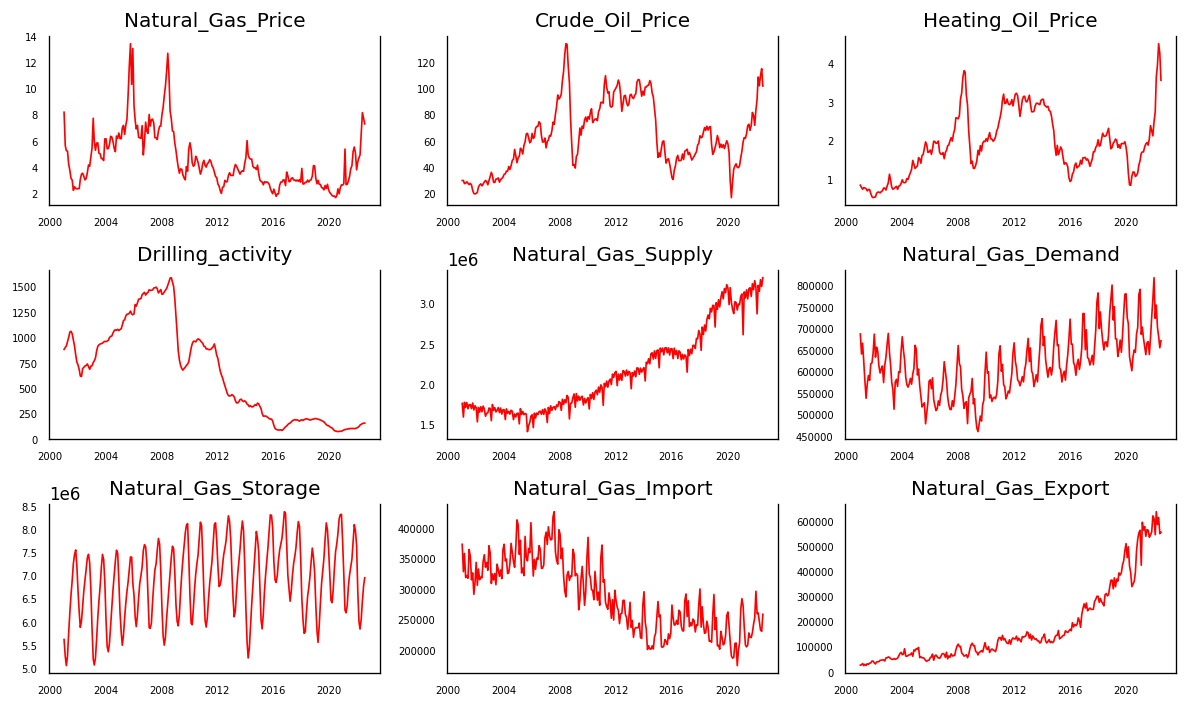

In [10]:
# Plot and visualize
fig, axes = plt.subplots(nrows=3, ncols=3, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [11]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)  

,Natural_Gas_Price_x,Crude_Oil_Price_x,Heating_Oil_Price_x,Drilling_activity_x,Natural_Gas_Supply_x,Natural_Gas_Demand_x,Natural_Gas_Storage_x,Natural_Gas_Import_x,Natural_Gas_Export_x
Natural_Gas_Price_y,1.0000,0.0013,0.0002,0.0093,0.2017,0.4830,0.2110,0.0147,0.1671
Crude_Oil_Price_y,0.0920,1.0000,0.1752,0.1993,0.4171,0.1273,0.0249,0.1967,0.1974
Heating_Oil_Price_y,0.0869,0.1345,1.0000,0.2598,0.0764,0.0361,0.0803,0.1586,0.0551
Drilling_activity_y,0.0000,0.0000,0.0000,1.0000,0.0272,0.0614,0.0029,0.0000,0.6621
Natural_Gas_Supply_y,0.5320,0.0697,0.0098,0.0147,1.0000,0.0000,0.0000,0.0000,0.0001
Natural_Gas_Demand_y,0.0001,0.0005,0.0018,0.0000,0.0000,1.0000,0.0000,0.0000,0.0001
Natural_Gas_Storage_y,0.0000,0.0034,0.0010,0.0003,0.0006,0.0000,1.0000,0.0000,0.0007
Natural_Gas_Import_y,0.0098,0.0001,0.0001,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
Natural_Gas_Export_y,0.3294,0.0540,0.2766,0.1286,0.0000,0.0000,0.0000,0.0054,1.0000


Looking at the P-Values in the above table, you can pretty much observe that all the variables (time series) in the system are interchangeably causing each other.This makes this system of multi time series a good candidate for using VAR models to forecast.

Cointegration test helps to establish the presence of a statistically significant connection between two or more time series. But, what does Cointegration mean? To understand that, you first need to know what is ‘order of integration’ (d).

Order of integration(d) is nothing but the number of differencing required to make a non-stationary time series stationary.

Now, when you have two or more time series, and there exists a linear combination of them that has an order of integration (d) less than that of the individual series, then the collection of series is said to be cointegrated.

When two or more time series are cointegrated, it means they have a long run, statistically significant relationship.

This is the basic premise on which Vector Autoregression(VAR) models is based on. So, it’s fairly common to implement the cointegration test before starting to build VAR models.

In [12]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Natural_Gas_Price ::  209.3     > 179.5199  =>   True
Crude_Oil_Price ::  149.51    > 143.6691  =>   True
Heating_Oil_Price ::  102.7     > 111.7797  =>   False
Drilling_activity ::  74.71     > 83.9383   =>   False
Natural_Gas_Supply ::  51.01     > 60.0627   =>   False
Natural_Gas_Demand ::  31.36     > 40.1749   =>   False
Natural_Gas_Storage ::  15.45     > 24.2761   =>   False
Natural_Gas_Import ::  3.84      > 12.3212   =>   False
Natural_Gas_Export ::  0.15      > 4.1296    =>   False


Splitting the dataset into training and test data. The VAR model will be fitted on df_train and then used to forecast the next 4 observations. These forecasts will be compared against the actuals present in test data. To do the comparisons, we will use multiple forecast accuracy metrics, as seen later in this article.

In [32]:
nobs = 12
df_train, df_test = df[0:-nobs], df[-nobs:]
# Check size 119 rows of train set and only 4 rows of test set
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(247, 9)
(12, 9)


Since the VAR model requires the time series you want to forecast to be stationary, it is customary to check all the time series in the system for stationarity. Just to refresh, a stationary time series is one whose characteristics like mean and variance does not change over time.

So, how to test for stationarity? There is a suite of tests called unit-root tests. The popular ones are:

    Augmented Dickey-Fuller Test (ADF Test)
    KPSS test
    Philip-Perron test

Let’s use the ADF test for our purpose.
By the way, if a series is found to be non-stationary, you make it stationary by differencing the series once and repeat the test again until it becomes stationary. Since, differencing reduces the length of the series by 1 and since all the time series has to be of the same length, you need to difference all the series in the system if you choose to difference at all.

First, we implement a nice function (adfuller_test()) that writes out the results of the ADF test for any given time series and implement this function on each series one-by-one.

In [33]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")


# ADF Test on each time series column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Natural_Gas_Price" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.1051
 No. Lags Chosen       = 0
 Critical value 1%     = -3.457
 Critical value 5%     = -2.873
 Critical value 10%    = -2.573
 => P-Value = 0.0262. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Crude_Oil_Price" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.8507
 No. Lags Chosen       = 1
 Critical value 1%     = -3.457
 Critical value 5%     = -2.873
 Critical value 10%    = -2.573
 => P-Value = 0.0514. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Heating_Oil_Price" 
    -----------------------------------------------
 Null Hypothesis: D

In [34]:
# 1st difference
df_differenced = df_train.diff().dropna()

In [35]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Natural_Gas_Price" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.9939
 No. Lags Chosen       = 8
 Critical value 1%     = -3.458
 Critical value 5%     = -2.874
 Critical value 10%    = -2.573
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Crude_Oil_Price" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.3018
 No. Lags Chosen       = 0
 Critical value 1%     = -3.457
 Critical value 5%     = -2.873
 Critical value 10%    = -2.573
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Heating_Oil_Price" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stat

In [13]:
# # After the first difference, Real Wages (Manufacturing) is still not stationary. It’s critical value is between 5% and 10% significance level.
# # Second Differencing
# df_differenced = df_differenced.diff().dropna()

In [19]:
# # ADF Test on each column of 2nd Differences Dataframe
# for name, column in df_differenced.iteritems():
#     adfuller_test(column, name=column.name)
#     print('\n')

    Augmented Dickey-Fuller Test on "Natural_Gas_Price" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.9252
 No. Lags Chosen       = 8
 Critical value 1%     = -3.46
 Critical value 5%     = -2.874
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Crude_Oil_Price" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.1054
 No. Lags Chosen       = 0
 Critical value 1%     = -3.459
 Critical value 5%     = -2.874
 Critical value 10%    = -2.573
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Heating_Oil_Price" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stati

To select the right order of the VAR model, we iteratively fit increasing orders of VAR model and pick the order that gives a model with least AIC. Though the usual practice is to look at the AIC, you can also check other best fit comparison estimates of BIC, FPE and HQIC.

In [36]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  108.72010065282406
BIC :  110.00627713833028
FPE :  1.6470893233261836e+47
HQIC:  109.23804281483731 

Lag Order = 2
AIC :  108.14481077537683
BIC :  110.59569506441427
FPE :  9.288153984733747e+46
HQIC:  109.13189158398247 

Lag Order = 3
AIC :  108.06431992519079
BIC :  111.68675401458098
FPE :  8.624946052876908e+46
HQIC:  109.52340146011096 

Lag Order = 4
AIC :  108.01969378211346
BIC :  112.8205874300894
FPE :  8.35223871769654e+46
HQIC:  109.95366626021737 

Lag Order = 5
AIC :  107.83379752410679
BIC :  113.82012918578782
FPE :  7.081901986867164e+46
HQIC:  110.24557967637215 

Lag Order = 6
AIC :  107.88220122013189
BIC :  115.06101899952475
FPE :  7.674189795212209e+46
HQIC:  110.77474067494109 

Lag Order = 7
AIC :  107.86418225869711
BIC :  116.24260487757807
FPE :  7.89086517313043e+46
HQIC:  111.24045593159444 

Lag Order = 8
AIC :  107.99276718281416
BIC :  117.57798496685685
FPE :  9.558888419906444e+46
HQIC:  111.85578167285374 

Lag Order = 9
AIC 

/opt/anaconda3/envs/cryptoquant/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [37]:
# An alternate method to choose the order(p) of the VAR models is to use 
# the model.select_order(maxlags) method. The selected order(p) is the 
# order that gives the lowest ‘AIC’, ‘BIC’, ‘FPE’ and ‘HQIC’ scores.
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,113.0,113.2,1.213e+49,113.1
1,108.8,110.2*,1.831e+47,109.4
2,108.2,110.8,1.022e+47,109.3*
3,108.1,111.9,9.291e+46,109.6
4,108.0,113.0,8.583e+46,110.0
5,107.9,114.0,7.784e+46,110.4
6,108.0,115.3,8.594e+46,110.9
7,107.9,116.4,8.540e+46,111.4
8,108.1,117.8,1.027e+47,112.0
9,108.0,118.9,1.079e+47,112.4


According to FPE and HQIC, the optimal lag is observed at a lag order of 3. However, we don’t have an explanation for why the observed AIC and BIC values differ when using result.aic versus as seen using model.select_order(). Since the explicitly computed AIC is the lowest at lag 4, I choose the selected order as 4.

In [38]:
model_fitted = model.fit(2)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 20, Nov, 2022
Time:                     04:18:52
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                    110.596
Nobs:                     244.000    HQIC:                   109.132
Log likelihood:          -16138.7    FPE:                9.28815e+46
AIC:                      108.145    Det(Omega_mle):     4.72973e+46
--------------------------------------------------------------------
Results for equation Natural_Gas_Price
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                         -0.033932         0.050205           -0.676           0.499
L1.Natural_Gas_Price          -0.111276         0.075569           -1.473           0.141
L1.Crude_Oil

Serial correlation of residuals is used to check if there is any leftover pattern in the residuals (errors).

What does this mean to us?

If there is any correlation left in the residuals, then, there is some pattern in the time series that is still left to be explained by the model. In that case, the typical course of action is to either increase the order of the model or induce more predictors into the system or look for a different algorithm to model the time series.

So, checking for serial correlation is to ensure that the model is sufficiently able to explain the variances and patterns in the time series.

Alright, coming back to topic.

A common way of checking for serial correlation of errors can be measured using the Durbin Watson’s Statistic Formula:
![Durbin Watson’s Statistic Formula](https://www.machinelearningplus.com/wp-content/uploads/2019/07/Durbin_Watson_Statistic_Formula-min.png)

The value of this statistic can vary between 0 and 4. The closer it is to the value 2, then there is no significant serial correlation. The closer to 0, there is a positive serial correlation, and the closer it is to 4 implies negative serial correlation.

In [39]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))

Natural_Gas_Price : 1.93
Crude_Oil_Price : 1.99
Heating_Oil_Price : 1.96
Drilling_activity : 2.01
Natural_Gas_Supply : 2.13
Natural_Gas_Demand : 2.2
Natural_Gas_Storage : 2.17
Natural_Gas_Import : 2.16
Natural_Gas_Export : 1.99


In order to forecast, the VAR model expects up to the lag order number of observations from the past data. This is because, the terms in the VAR model are essentially the lags of the various time series in the dataset, so you need to provide it as many of the previous values as indicated by the lag order used by the model.

In [40]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

2


array([[ 3.50000e-01,  6.21000e+00,  7.70000e-02, -3.00000e+00,
        -1.12080e+05, -1.94970e+04,  2.47804e+05,  2.96900e+03,
        -3.88910e+04],
       [ 5.80000e-01,  1.11000e+00,  3.60000e-02,  5.00000e+00,
         1.26152e+05,  2.77330e+04,  1.69642e+05,  1.99200e+04,
         2.68810e+04]])

In [41]:
# # Forecast
# fc = model_fitted.forecast(y=forecast_input, steps=nobs)
# df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
# df_forecast
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_1d')
df_forecast

,Natural_Gas_Price_1d,Crude_Oil_Price_1d,Heating_Oil_Price_1d,Drilling_activity_1d,Natural_Gas_Supply_1d,Natural_Gas_Demand_1d,Natural_Gas_Storage_1d,Natural_Gas_Import_1d,Natural_Gas_Export_1d
Date,,,,,,,,,
2021-08-15,0.032508,-1.284185,-0.010162,5.366997,-97190.531835,-9795.237440,116542.972215,-11885.544651,-10451.979344
2021-09-15,0.042978,-0.716483,-0.009953,6.591503,53575.795542,19594.961806,-22005.455053,12567.349041,14860.960733
2021-10-15,-0.026246,-0.704198,-0.010512,-0.615254,-4059.727603,11588.077166,-130727.406373,4501.941593,1821.900785
2021-11-15,0.033359,-0.010916,0.006942,-0.679142,-14470.729759,-552.196100,-165401.259148,-1515.316454,2959.804704
2021-12-15,-0.031381,0.196424,0.004471,-3.344658,17087.183045,-71.689622,-128950.273393,-698.466557,3160.044066
2022-01-15,-0.007230,0.518144,0.010760,-2.343711,3043.181901,-7059.141239,-54924.079969,-4941.538922,164.070346
2022-02-15,-0.018443,0.618671,0.010647,-1.398866,7973.960580,-8160.557462,27825.644268,-3718.172588,412.619428
2022-03-15,-0.016127,0.460475,0.007169,-0.775629,12423.723248,-4863.411956,84835.582243,-1968.589905,869.443504
2022-04-15,-0.008921,0.241646,0.004501,-0.405880,5326.492211,-2798.353043,106361.611978,-1240.145264,1071.247282


The forecasts are generated but it is on the scale of the training data used by the model. So, to bring it back up to its original scale, you need to de-difference it as many times you had differenced the original input data. In this case it is two times.

In [47]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

df_results = invert_transformation(df_train, df_forecast, second_diff=False)        
df_results.loc[:, df.columns+'_forecast']
# df_results.loc[:, ['rgnp_forecast', 'pgnp_forecast', 'ulc_forecast', 'gdfco_forecast',
#                    'gdf_forecast', 'gdfim_forecast', 'gdfcf_forecast', 'gdfce_forecast']]

,Natural_Gas_Price_forecast,Crude_Oil_Price_forecast,Heating_Oil_Price_forecast,Drilling_activity_forecast,Natural_Gas_Supply_forecast,Natural_Gas_Demand_forecast,Natural_Gas_Storage_forecast,Natural_Gas_Import_forecast,Natural_Gas_Export_forecast
Date,,,,,,,,,
2021-08-15,3.872508,71.205815,1.936838,107.366997,3.085087e+06,656235.762560,7.305251e+06,215893.455349,555594.020656
2021-09-15,3.915487,70.489332,1.926884,113.958499,3.138663e+06,675830.724366,7.283246e+06,228460.804390,570454.981389
2021-10-15,3.889240,69.785134,1.916372,113.343245,3.134604e+06,687418.801532,7.152518e+06,232962.745983,572276.882173
2021-11-15,3.922599,69.774218,1.923314,112.664103,3.120133e+06,686866.605433,6.987117e+06,231447.429530,575236.686878
2021-12-15,3.891218,69.970642,1.927786,109.319445,3.137220e+06,686794.915811,6.858167e+06,230748.962973,578396.730943
2022-01-15,3.883988,70.488785,1.938546,106.975734,3.140263e+06,679735.774572,6.803242e+06,225807.424051,578560.801289
2022-02-15,3.865545,71.107456,1.949192,105.576868,3.148237e+06,671575.217110,6.831068e+06,222089.251463,578973.420717
2022-03-15,3.849417,71.567931,1.956361,104.801240,3.160661e+06,666711.805153,6.915904e+06,220120.661558,579842.864221
2022-04-15,3.840496,71.809576,1.960862,104.395360,3.165987e+06,663913.452110,7.022265e+06,218880.516294,580914.111502


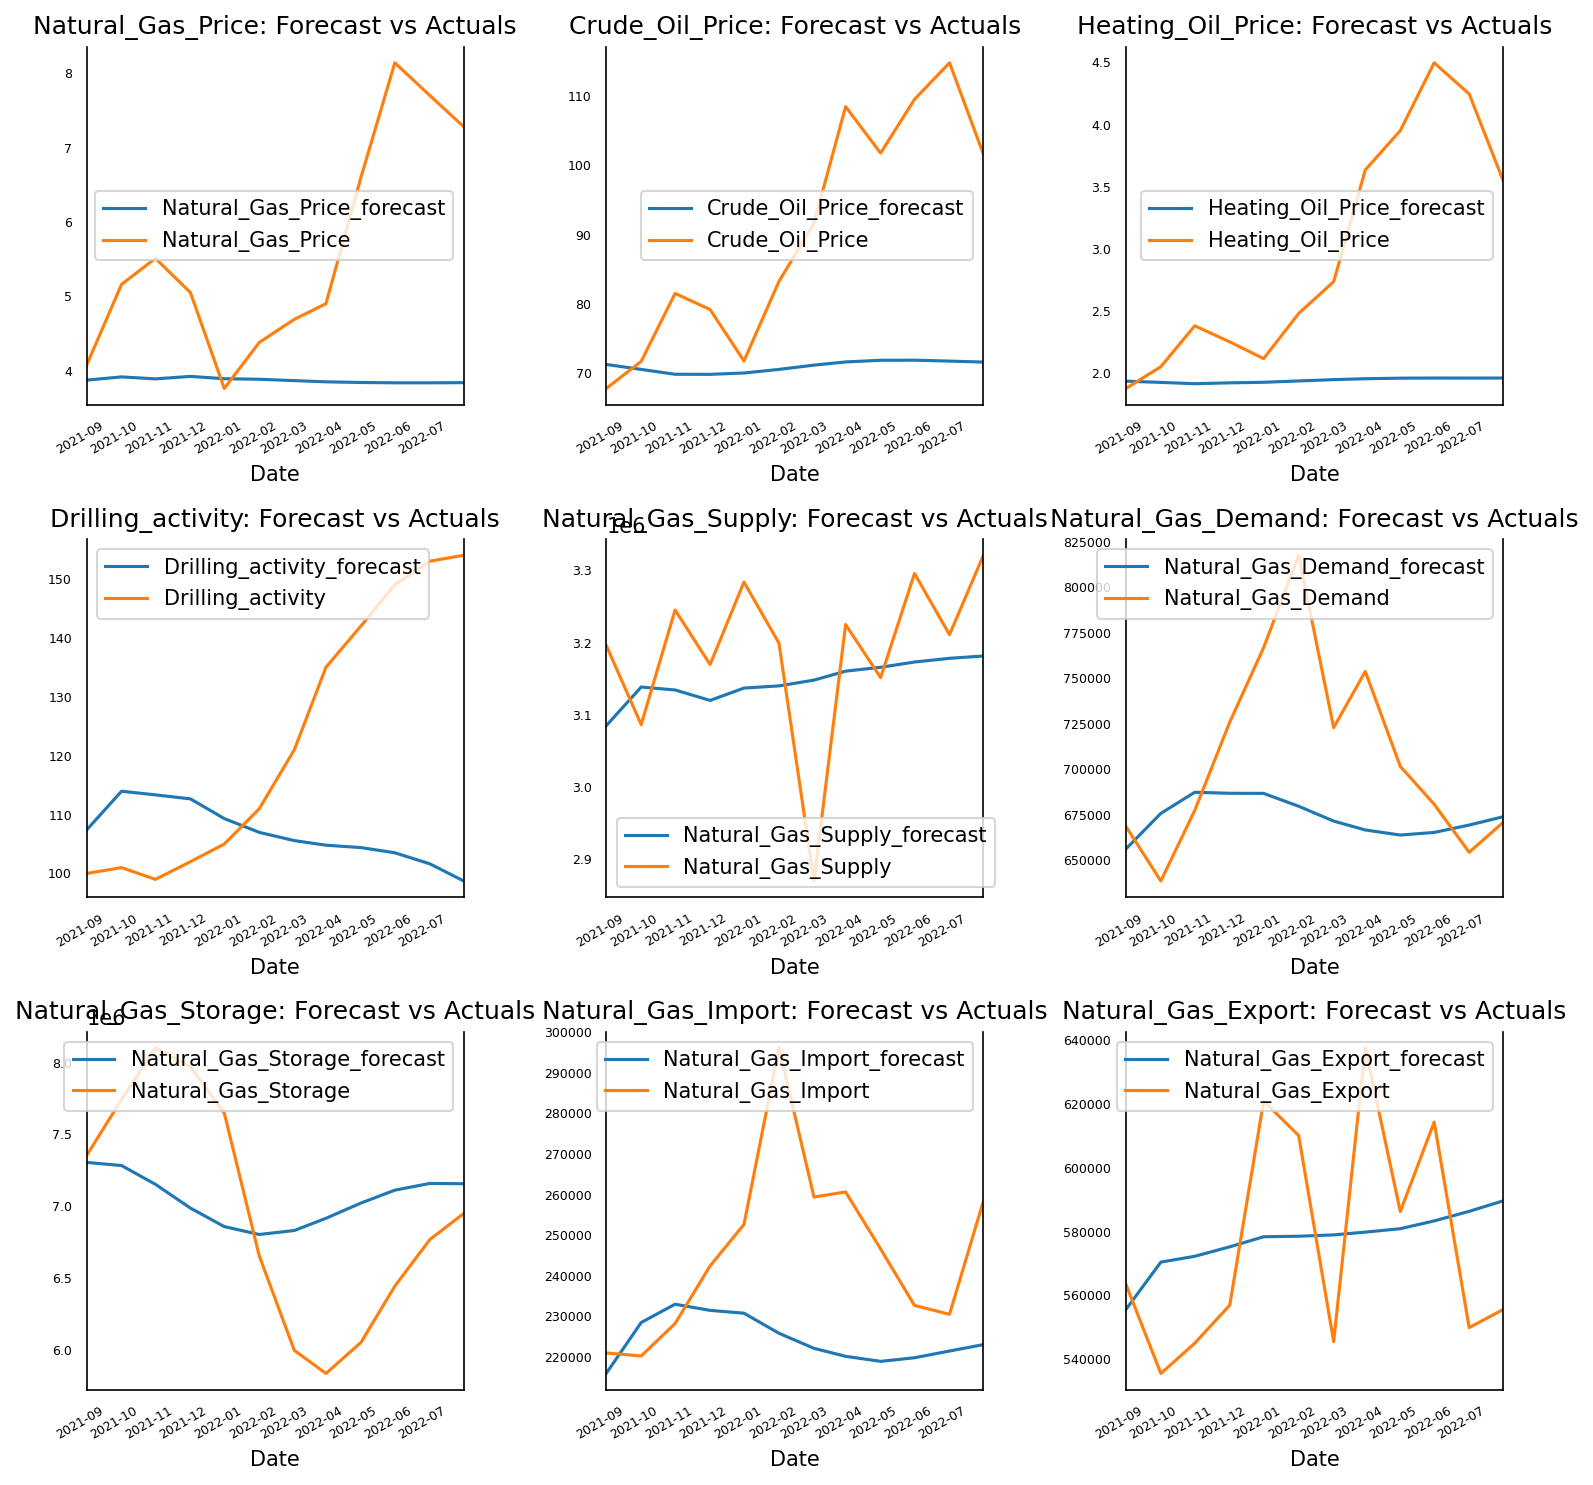

In [43]:
# plot forecast vs. actuals
fig, axes = plt.subplots(nrows=int(len(df.columns)/3), ncols=3, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [46]:
# cal metrics: MAPE, ME, MAE, MPE, RMSE, corr and minmax.
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

for variable in df.columns:
    print('Forecast Accuracy of: '+ variable)
    accuracy_prod = forecast_accuracy(df_results[variable + '_forecast'].values, df_test[variable])
    for k, v in accuracy_prod.items():
        print(k, ': ', round(v,4))
    print('-----------------')

Forecast Accuracy of: Natural_Gas_Price
mape :  0.2722
me :  -1.7332
mae :  1.7551
mpe :  -0.2664
rmse :  2.2444
corr :  -0.6667
minmax :  0.2721
-----------------
Forecast Accuracy of: Crude_Oil_Price
mape :  0.1985
me :  -19.3009
mae :  19.8802
mpe :  -0.1899
rmse :  24.6249
corr :  0.7614
minmax :  0.1983
-----------------
Forecast Accuracy of: Heating_Oil_Price
mape :  0.2955
me :  -1.0385
mae :  1.0483
mpe :  -0.2903
rmse :  1.3617
corr :  0.8782
minmax :  0.2954
-----------------
Forecast Accuracy of: Drilling_activity
mape :  0.1787
me :  -15.8097
mae :  24.085
mpe :  -0.0966
rmse :  30.1416
corr :  -0.8987
minmax :  0.1746
-----------------
Forecast Accuracy of: Natural_Gas_Supply
mape :  0.0313
me :  -41031.899
mae :  98429.6895
mpe :  -0.0116
rmse :  119745.3721
corr :  0.1848
minmax :  0.0305
-----------------
Forecast Accuracy of: Natural_Gas_Demand
mape :  0.0591
me :  -33000.5723
mae :  43869.714
mpe :  -0.0424
rmse :  58249.2429
corr :  0.334
minmax :  0.0588
-----------

/opt/anaconda3/envs/cryptoquant/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/envs/cryptoquant/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  del sys.path[0]
